In [3]:
import pandas as pd

In [55]:
hwaseong = pd.read_excel('../data\Hwaseong_data.xlsx')

In [56]:
def change(pas):
    df = pd.read_csv(pas)
    le = []
    for i in range(len(df)):
        if df['day'][i][0] == " ":
            le.append(i)
    # le는 잘리는 부분에 대한 index
    temperature = []
    for index in range(len(le)):
        if index == len(le)-1:
            break
        tem = df['value'][le[index]+1 : le[index+1]]
        for x in range(le[index]+1, le[index+1]):
            if tem[x] == -50.0:
                tem[x] = tem[x-1]
            
        mean_tem = round(sum(tem) / len(tem), 2)
        max_tem = round(max(tem), 2)
        min_tem = round(min(tem), 2)
        temperature.append([mean_tem, max_tem, min_tem])


    print(f'Total Month : {len(temperature)}')
    print(temperature)
    return temperature

In [57]:
pass1 = '../data/봉담읍_기온_201401_201412.csv'
pass2 = '../data/봉담읍_기온_201501_201512.csv'
pass3 = '../data/봉담읍_기온_201601_201612.csv'
pass4 = '../data/봉담읍_기온_201701_201712.csv'
pass5 = '../data/봉담읍_기온_201801_201812.csv'
pass6 = '../data/봉담읍_기온_201901_201912.csv'
pass7 = '../data/봉담읍_기온_202001_202012.csv'
pass8 = '../data/봉담읍_기온_202101_202112.csv'
pass9 = '../data/봉담읍_기온_202201_202212.csv'
pass10 = '../data/봉담읍_기온_202301_202307.csv'

pass_list = [pass1, pass2, pass3, pass4, pass5, pass6, pass7, pass8, pass9, pass10]

In [58]:
tem_list = []
for li in pass_list:
    mon_data = change(li)
    for data in mon_data:
        tem_list.append(data)


Total Month : 12
[[-0.63, 8.2, -9.3], [1.59, 14.0, -8.7], [6.97, 21.5, -3.6], [12.68, 24.6, 0.9], [17.46, 30.1, 6.2], [22.2, 29.6, 16.6], [25.0, 32.0, 19.4], [24.03, 33.5, 17.9], [20.78, 29.1, 12.8], [14.62, 26.3, 2.3], [8.03, 19.1, -1.3], [-2.2, 7.4, -9.5]]
Total Month : 12
[[-0.8, 8.6, -10.6], [1.11, 12.1, -12.1], [5.7, 20.7, -6.1], [12.89, 26.4, 2.1], [17.72, 30.1, -1.0], [22.58, 33.4, 13.7], [25.11, 34.1, -1.0], [25.81, 34.5, 18.5], [21.66, 29.9, 13.1], [14.95, 25.2, -0.1], [9.25, 20.0, -4.8], [2.18, 12.4, -8.4]]
Total Month : 12
[[-2.24, 10.3, -15.9], [0.68, 16.9, -10.0], [6.66, 20.7, -4.2], [13.4, 28.8, 3.7], [18.65, 30.2, 8.8], [22.52, 30.3, 15.3], [25.43, 33.4, 19.4], [26.84, 34.3, 16.1], [22.26, 30.8, 14.4], [15.28, 27.8, -1.2], [6.96, 18.2, -5.2], [1.71, 13.4, -9.2]]
Total Month : 12
[[-1.57, 11.2, -12.4], [-0.21, 12.8, -9.3], [5.24, 17.9, -5.8], [12.94, 27.4, 0.1], [18.35, 29.8, 7.9], [22.11, 32.6, 11.5], [26.77, 34.7, 21.5], [25.5, 36.1, 14.4], [21.15, 29.3, 9.3], [15.25, 2

In [59]:
tem_mean = []
tem_max = []
tem_min = []
for x in tem_list:
    tem_mean.append(x[0])
    tem_max.append(x[1])
    tem_min.append(x[2])

In [60]:
last_tem = pd.DataFrame({'월평균기온' : tem_mean, '월최고기온' : tem_max, '월최저기온' : tem_min}, index = hwaseong['월별'])

In [61]:
last_tem

,월평균기온,월최고기온,월최저기온
월별,,,
2014-01-01,-0.63,8.2,-9.3
2014-02-01,1.59,14.0,-8.7
2014-03-01,6.97,21.5,-3.6
2014-04-01,12.68,24.6,0.9
2014-05-01,17.46,30.1,6.2
...,...,...,...
2022-12-01,-3.79,8.6,-14.1
2023-01-01,-1.94,12.5,-16.4
2023-02-01,1.61,11.3,-6.9


In [62]:
last_tem.to_csv('기온데이터.csv')

In [63]:
x = last_tem.index
y1 = last_tem['월평균기온']
y2 = last_tem['월최고기온']
y3 = last_tem['월최저기온']

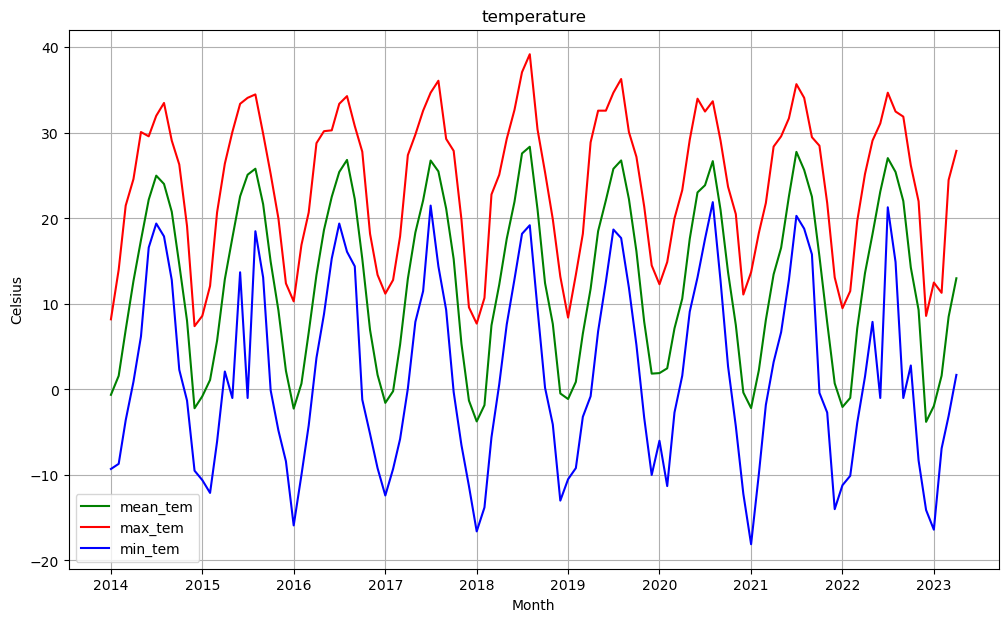

In [64]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (12, 7))
ax = plt.subplot(111)

ax.plot(x, y1, color='g', label='mean_tem')
ax.plot(x, y2, color='r', label='max_tem')
ax.plot(x, y3, color='b', label='min_tem')

# 그래프 제목과 축 레이블 설정
ax.set_title('temperature')
ax.set_xlabel('Month')
ax.set_ylabel('Celsius')

# 그리드 표시
ax.grid(True)

# 범례 추가
ax.legend()

# 그래프 표시
plt.show()

# 강수량

In [117]:
pass1 = '../data/봉담읍_강수_201401_201412.csv'
pass2 = '../data/봉담읍_강수_201501_201512.csv'
pass3 = '../data/봉담읍_강수_201601_201612.csv'
pass4 = '../data/봉담읍_강수_201701_201712.csv'
pass5 = '../data/봉담읍_강수_201801_201812.csv'
pass6 = '../data/봉담읍_강수_201901_201912.csv'
pass7 = '../data/봉담읍_강수_202001_202012.csv'
pass8 = '../data/봉담읍_강수_202101_202112.csv'
pass9 = '../data/봉담읍_강수_202201_202212.csv'
pass10 = '../data/봉담읍_강수_202301_202304.csv'

pass_list = [pass1, pass2, pass3, pass4, pass5, pass6, pass7, pass8, pass9, pass10]

In [119]:
def gangsu(pas):
    df = pd.read_csv(pas)
    le = []
    for i in range(len(df)):
        if df['day'][i][0] == " ":
            le.append(i)

    temperature = []
    for index in range(len(le)):
        if index == len(le)-1:
            break
        tem = df['value'][le[index]+1 : le[index+1]]
        mean_gangsu = round(sum(tem) / len(tem), 2)

        temperature.append(mean_gangsu)


    print(f'Total Month : {len(temperature)}')
    print(temperature)
    return temperature


In [123]:
gangsu_list = []
for li in pass_list:
    mon_data = gangsu(li)
    for data in mon_data:
        gangsu_list.append(data)


Total Month : 12
[0.01, 0.03, 0.01, 0.09, 0.09, 0.15, 0.48, 0.46, 0.16, 0.14, 0.06, 0.04]
Total Month : 12
[0.03, 0.03, 0.02, 0.16, 0.04, 0.07, 0.21, 0.07, 0.01, 0.08, 0.14, 0.05]
Total Month : 12
[0.0, 0.06, 0.08, 0.1, 0.19, 0.04, 0.33, 0.05, 0.05, 0.11, 0.01, 0.08]
Total Month : 12
[0.02, 0.03, 0.01, 0.06, 0.03, 0.03, 0.36, 0.19, 0.03, 0.02, 0.02, 0.05]
Total Month : 12
[0.01, 0.01, 0.08, 0.16, 0.21, 0.14, 0.24, 0.29, 0.09, 0.18, 0.1, 0.03]
Total Month : 12
[0.0, 0.05, 0.06, 0.06, 0.04, 0.09, 0.26, 0.15, 0.28, 0.09, 0.12, 0.02]
Total Month : 12
[0.06, 0.08, 0.02, 0.02, 0.13, 0.13, 0.45, 0.89, 0.23, 0.03, 0.08, 0.01]
Total Month : 12
[0.03, 0.04, 0.11, 0.16, 0.2, 0.07, 0.18, 0.31, 0.12, 0.05, 0.15, 0.02]
Total Month : 12
[0.01, 0.01, 0.09, 0.06, 0.02, 0.64, 0.37, 0.77, 0.26, 0.14, 0.07, 0.03]
Total Month : 4
[0.05, 0.0, 0.01, 0.09]


In [124]:
print(gangsu_list)

[0.01, 0.03, 0.01, 0.09, 0.09, 0.15, 0.48, 0.46, 0.16, 0.14, 0.06, 0.04, 0.03, 0.03, 0.02, 0.16, 0.04, 0.07, 0.21, 0.07, 0.01, 0.08, 0.14, 0.05, 0.0, 0.06, 0.08, 0.1, 0.19, 0.04, 0.33, 0.05, 0.05, 0.11, 0.01, 0.08, 0.02, 0.03, 0.01, 0.06, 0.03, 0.03, 0.36, 0.19, 0.03, 0.02, 0.02, 0.05, 0.01, 0.01, 0.08, 0.16, 0.21, 0.14, 0.24, 0.29, 0.09, 0.18, 0.1, 0.03, 0.0, 0.05, 0.06, 0.06, 0.04, 0.09, 0.26, 0.15, 0.28, 0.09, 0.12, 0.02, 0.06, 0.08, 0.02, 0.02, 0.13, 0.13, 0.45, 0.89, 0.23, 0.03, 0.08, 0.01, 0.03, 0.04, 0.11, 0.16, 0.2, 0.07, 0.18, 0.31, 0.12, 0.05, 0.15, 0.02, 0.01, 0.01, 0.09, 0.06, 0.02, 0.64, 0.37, 0.77, 0.26, 0.14, 0.07, 0.03, 0.05, 0.0, 0.01, 0.09]


In [125]:
last_gang = pd.DataFrame({'월평균강수' : gangsu_list}, index = hwaseong['월별'])

In [126]:
last_gang

,월평균강수
월별,
2014-01-01,0.01
2014-02-01,0.03
2014-03-01,0.01
2014-04-01,0.09
2014-05-01,0.09
...,...
2022-12-01,0.03
2023-01-01,0.05
2023-02-01,0.00


In [128]:
last_gang.to_csv("강수데이터.csv")

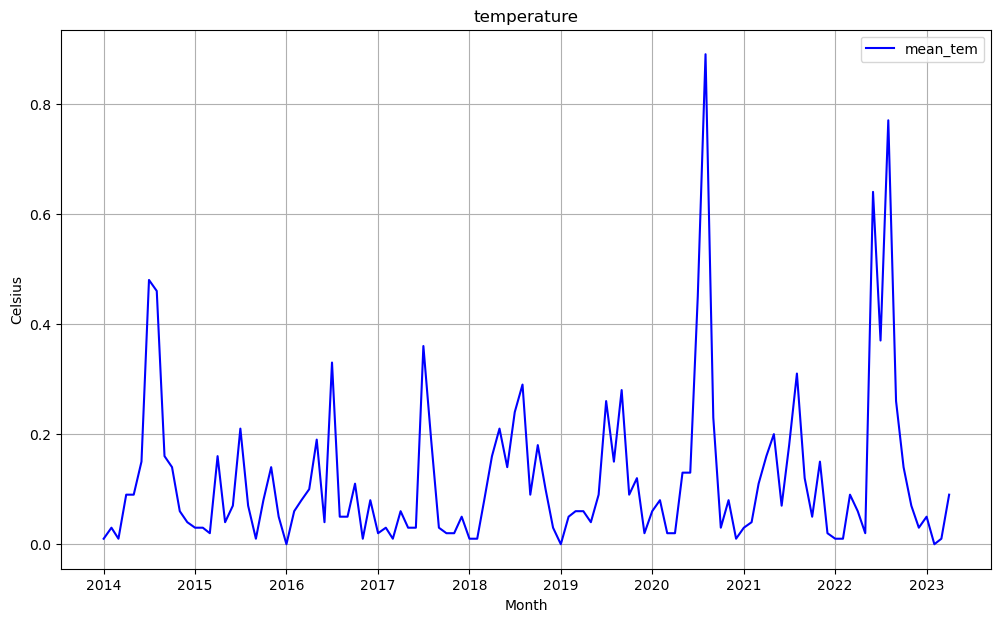

In [132]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (12, 7))
ax = plt.subplot(111)

ax.plot(x, y1, color='b', label='mean_tem')


# 그래프 제목과 축 레이블 설정
ax.set_title('temperature')
ax.set_xlabel('Month')
ax.set_ylabel('Celsius')

# 그리드 표시
ax.grid(True)

# 범례 추가
ax.legend()

# 그래프 표시
plt.show()